## Executing Machine Learning Models:

Machine learning models are highly advantageous for natural language processing (NLP) tasks due to their ability to automatically recognize complex patterns, scalability to handle large volumes of text data, and adaptability to a wide range of NLP applications. 

These models excel in feature extraction from text, leverage transfer learning for enhanced performance, support multiple languages, and offer interpretability, making them invaluable for tasks like sentiment analysis, text classification, machine translation, and more. Their efficiency, adaptability to changing language trends, and capacity to handle noisy data further reinforce their significance in extracting valuable insights and automation in NLP across various domains and industries.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, confusion_matrix

In [9]:
def evaluate_metrics(model, X, y):
    y_pred=model.predict(X)

    accuracy=accuracy_score(y, y_pred)*100
    precision=precision_score(y, y_pred, average='weighted')
    recall=recall_score(y, y_pred, average='weighted')
    f1=f1_score(y, y_pred, average='weighted')
    mae=mean_absolute_error(y, y_pred)

    metrics_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'MAE': mae
    }

    return metrics_dict

The evaluate_metrics function takes a machine learning model, a feature dataset X, and corresponding target labels y as input, computes various classification metrics including accuracy, precision, recall, F1-score, and mean absolute error (MAE) for model evaluation, and returns these metrics as a dictionary. These metrics provide a comprehensive assessment of the model's performance, including its accuracy in predictions, ability to distinguish between classes, and overall predictive power.

### Metrics Used:

-Accuracy: This metric measures the overall correctness of the model's predictions. Higher accuracy indicates a better ability to classify the data correctly.

-Precision: Precision represents the proportion of true positive predictions among all positive predictions made by the model. It is a measure of how many of the predicted positive instances are actually correct.

-Recall: Recall, also known as sensitivity, quantifies the ability of the model to correctly identify all actual positive instances. It's the ratio of true positives to the total number of actual positives.

-F1-Score: The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when dealing with imbalanced datasets.

-MAE (Mean Absolute Error): MAE measures the average absolute difference between predicted and actual values. In classification, it can be interpreted as the average absolute difference between predicted and actual class labels.

## ML Model with BAG of Words:

Bag of Words (BoW) is a foundational technique in natural language processing (NLP) used to convert text data into numerical vectors for machine learning. In BoW, a document or piece of text is represented as a collection of individual words, ignoring grammar and word order, but keeping track of the word frequency. 

This technique helps us understand the presence and frequency of words within a document, making it a crucial step in various NLP tasks such as text classification, sentiment analysis, and document retrieval.

In this project, we will be implementing and comparing several ML models using the Bag of Words approach. 

These models include Naive Bayes, Logistic Regression, Random Forest, Support Vector Classifier, Gradient Boosting Classifier, and Decision Tree Classifier. 

By applying these models to our BoW representations, we aim to explore their effectiveness in tasks like text classification and gain insights into which algorithms perform best in capturing the underlying patterns in textual data. This project offers an exciting opportunity to harness the power of NLP and machine learning to extract meaningful information from text documents.

In [8]:
bow_models = []

In [10]:
cv=CountVectorizer().fit(preprocessed_tweets_str)
BOW_X=cv.transform(preprocessed_tweets_str)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(BOW_X, df['label'].values, test_size=0.2, random_state=42)

In [12]:
ros = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

As observed during data preprocessing, the target variable exhibited an imbalance, so we are employing the Random Under-Sampling technique with a specified random state to balance the class distribution by reducing the number of instances in the majority class.

#### Model Implementation:

##### Naive Bayes:

In [13]:
nb_model=MultinomialNB()
nb_model.fit(X_resampled,y_resampled)
nb_model_pred=nb_model.predict(X_test)

nb_confusion=confusion_matrix(y_test, nb_model_pred)

nb_metrics=evaluate_metrics(nb_model, X_test, y_test)
nb_metrics

{'Accuracy': 62.227074235807855,
 'Precision': 0.6243031905311766,
 'Recall': 0.6222707423580786,
 'F1-Score': 0.6162018163087538,
 'MAE': 0.5520378457059679}

In [14]:
bow_models.append({'Model Name': 'Naive Bayes', **nb_metrics})
scores_bow_models = pd.DataFrame(bow_models)
scores_bow_models

,Model Name,Accuracy,Precision,Recall,F1-Score,MAE
0,Naive Bayes,62.227074,0.624303,0.622271,0.616202,0.552038


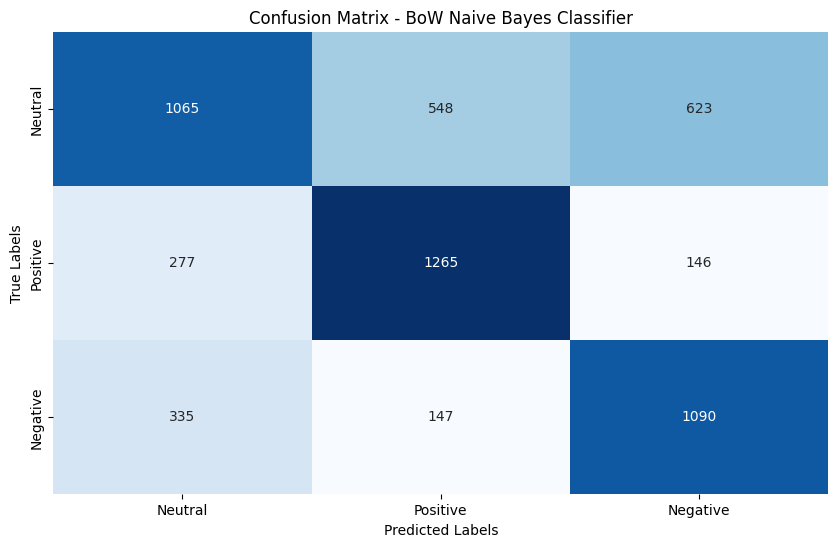

In [15]:
plt.figure(figsize=(10,6))

sns.heatmap(nb_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - BoW Naive Bayes Classifier")
plt.show()

##### Logistic Model:

In [16]:
logistic_model=LogisticRegression()
logistic_model.fit(X_resampled,y_resampled)
logistic_pred=logistic_model.predict(X_test)

logistic_confusion=confusion_matrix(y_test, logistic_pred)

logistic_metrics=evaluate_metrics(logistic_model, X_test, y_test)
logistic_metrics

{'Accuracy': 68.12227074235808,
 'Precision': 0.6812281250675212,
 'Recall': 0.6812227074235808,
 'F1-Score': 0.6812144321354541,
 'MAE': 0.4747088791848617}

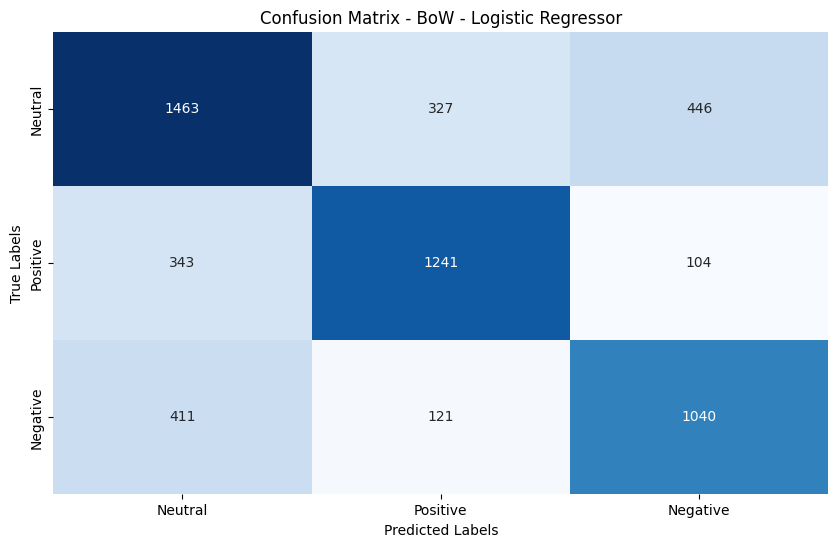

In [17]:
plt.figure(figsize=(10,6))

sns.heatmap(logistic_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - BoW - Logistic Regressor")
plt.show()

In [18]:
bow_models.append({'Model Name': 'Logistic Regression', **logistic_metrics})
scores_bow_models = pd.DataFrame(bow_models)

##### Random Forest Classifier:

In [19]:
rf_model=RandomForestClassifier()
rf_model.fit(X_resampled, y_resampled)
rf_pred=rf_model.predict(X_test)

rf_metrics=evaluate_metrics(rf_model, X_test, y_test)
rf_metrics

{'Accuracy': 69.26855895196506,
 'Precision': 0.6915880783068593,
 'Recall': 0.6926855895196506,
 'F1-Score': 0.6916566854419416,
 'MAE': 0.45505822416302766}

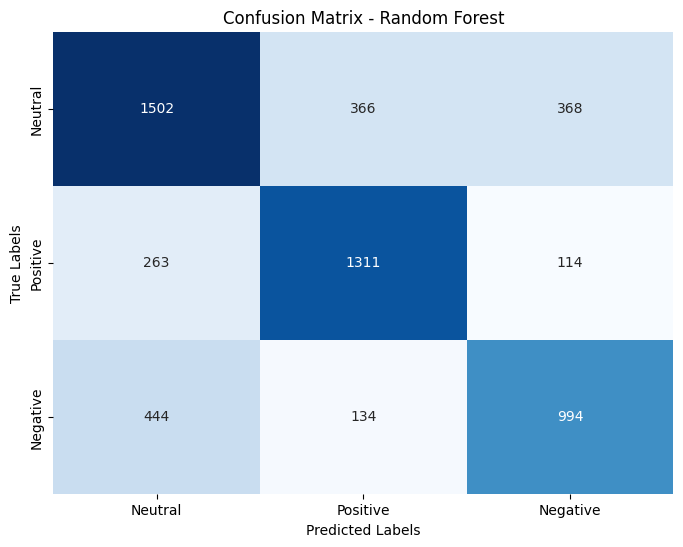

In [20]:
rf_confusion=confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))

sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [21]:
bow_models.append({'Model Name': 'Random Forest', **rf_metrics})
scores_bow_models = pd.DataFrame(bow_models)

##### Support Vector Classifier:

In [22]:
svc_model = SVC()
svc_model.fit(X_resampled,y_resampled)
svc_pred=svc_model.predict(X_test)

svc_confusion=confusion_matrix(y_test, svc_pred)

svc_metrics=evaluate_metrics(svc_model, X_test, y_test)
print(svc_metrics)

bow_models.append({'Model Name': 'Support Vector Classifier', **svc_metrics})
scores_bow_models = pd.DataFrame(bow_models)

{'Accuracy': 69.86899563318777, 'Precision': 0.6999610631863198, 'Recall': 0.6986899563318777, 'F1-Score': 0.6980055191200489, 'MAE': 0.45287481804949054}


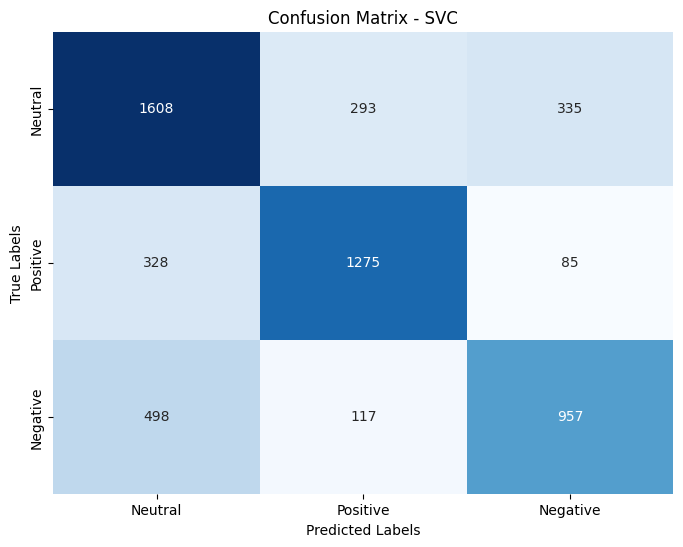

In [23]:
plt.figure(figsize=(8,6))

sns.heatmap(svc_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVC")
plt.show()

##### Gradient Boosting Classifier:

In [24]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_resampled,y_resampled)
gb_pred=gb_model.predict(X_test)

gb_metrics=evaluate_metrics(gb_model, X_test, y_test)
gb_metrics

{'Accuracy': 66.79403202328966,
 'Precision': 0.6920810054075203,
 'Recall': 0.6679403202328966,
 'F1-Score': 0.6625614531648669,
 'MAE': 0.5043668122270742}

In [25]:
bow_models.append({'Model Name': 'Gradient Boosting Classifier', **gb_metrics})
scores_bow_models = pd.DataFrame(bow_models)

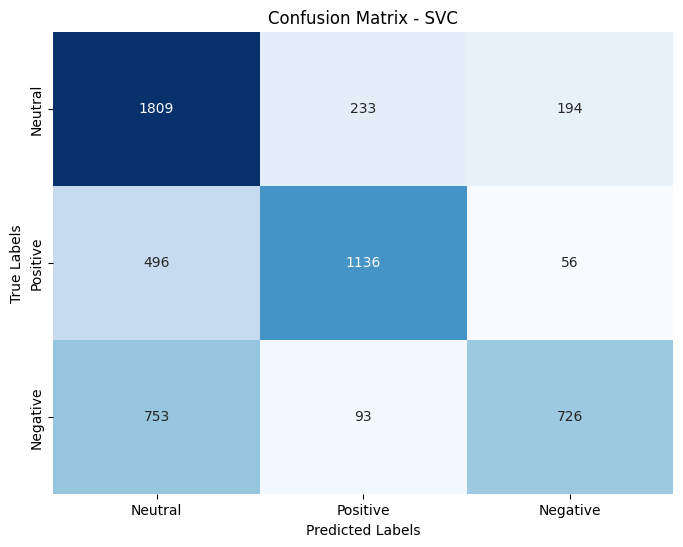

In [26]:
gb_confusion=confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(8,6))

sns.heatmap(gb_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVC")
plt.show()

##### Decision Tree Classifier:

In [27]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled,y_resampled)
dt_pred=dt_model.predict(X_test)

dt_metrics=evaluate_metrics(dt_model, X_test, y_test)
dt_metrics

{'Accuracy': 64.8471615720524,
 'Precision': 0.6492575862603212,
 'Recall': 0.648471615720524,
 'F1-Score': 0.6480619394298043,
 'MAE': 0.5105531295487628}

In [28]:
bow_models.append({'Model Name': 'Decision Tree Classifier', **dt_metrics})
scores_bow_models = pd.DataFrame(bow_models)

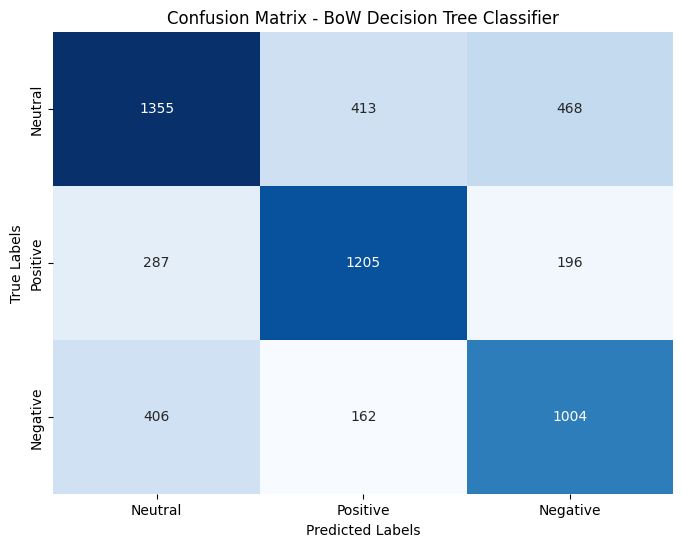

In [29]:
dt_confusion=confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8,6))

sns.heatmap(dt_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - BoW Decision Tree Classifier")
plt.show()

In [30]:
scores_bow_models

,Model Name,Accuracy,Precision,Recall,F1-Score,MAE
0,Naive Bayes,62.227074,0.624303,0.622271,0.616202,0.552038
1,Logistic Regression,68.122271,0.681228,0.681223,0.681214,0.474709
2,Random Forest,69.268559,0.691588,0.692686,0.691657,0.455058
3,Support Vector Classifier,69.868996,0.699961,0.698690,0.698006,0.452875
4,Gradient Boosting Classifier,66.794032,0.692081,0.667940,0.662561,0.504367
5,Decision Tree Classifier,64.847162,0.649258,0.648472,0.648062,0.510553


For BoW, we got these scores which reflect how each model performed in classifying text data represented using the Bag of Words approach. 

For example, Logistic Regression achieved an accuracy of 68.12%, indicating its ability to make correct predictions in the majority of cases, while the Support Vector Classifier achieved a higher recall (0.698) compared to precision (0.699), suggesting its capability to correctly identify a substantial portion of positive instances but with some false positives. 

These scores collectively provide insights into the strengths and weaknesses of each model when applied to text classification tasks using BoW.

## ML Model with Tf-Idf:

TF-IDF, short for Term Frequency-Inverse Document Frequency, is a fundamental technique in NLP that plays a pivotal role in converting text data into numerical vectors suitable for ML. Unlike Bag of Words (BoW), which represents text as a collection of individual words, TF-IDF considers the importance of words in a document within a larger corpus.

In TF-IDF, each document or piece of text is represented as a numerical vector that captures the importance of each word. This importance is determined by two key factors: Term Frequency (TF), which measures how frequently a word occurs within a specific document, and Inverse Document Frequency (IDF), which quantifies the uniqueness of a word across the entire corpus. By combining TF and IDF, TF-IDF assigns weight to each word in a document, reflecting its relative importance in that document and across the corpus. This technique is invaluable in NLP for tasks such as text classification, information retrieval, and sentiment analysis, as it enables the identification of key terms and the extraction of meaningful insights from textual data.

In [31]:
tfidf_models=[]

In [32]:
tfidf=TfidfVectorizer().fit(preprocessed_tweets_str)
X_tdidf=tfidf.transform(preprocessed_tweets_str)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_tdidf, df['label'].values, test_size=0.2, random_state=42)

In [34]:
ros=RandomUnderSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

##### Naive Bayes:

In [35]:
nb_model=MultinomialNB()
nb_model.fit(X_resampled,y_resampled)
nb_model_pred=nb_model.predict(X_test)

nb_confusion=confusion_matrix(y_test, nb_model_pred)

nb_metrics=evaluate_metrics(nb_model, X_test, y_test)
nb_metrics

{'Accuracy': 62.26346433770015,
 'Precision': 0.6245024662243807,
 'Recall': 0.6226346433770015,
 'F1-Score': 0.6168120832544315,
 'MAE': 0.5491266375545851}

In [36]:
tfidf_models.append({'Model Name': 'TfIdf- Naive Bayes', **nb_metrics})
scores_tfidf_models = pd.DataFrame(tfidf_models)
scores_tfidf_models

,Model Name,Accuracy,Precision,Recall,F1-Score,MAE
0,TfIdf- Naive Bayes,62.263464,0.624502,0.622635,0.616812,0.549127


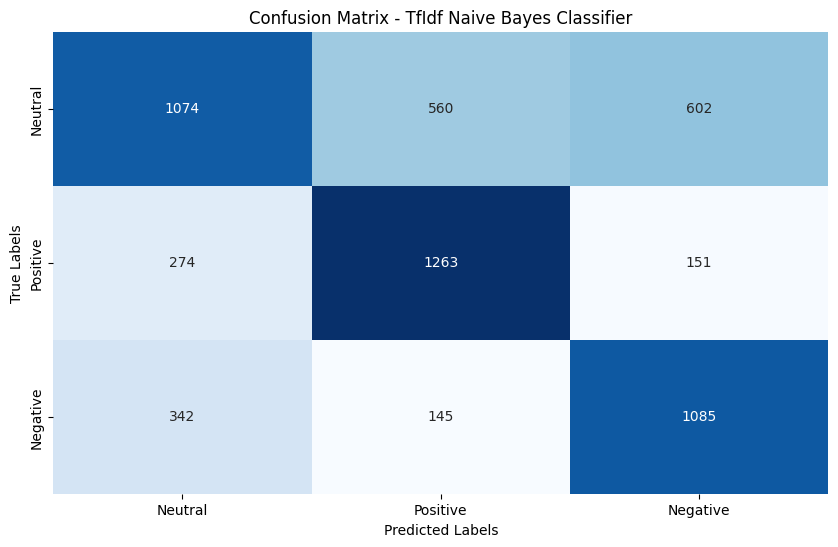

In [37]:
plt.figure(figsize=(10,6))

sns.heatmap(nb_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - TfIdf Naive Bayes Classifier")
plt.show()

##### Logistic Model:

In [38]:
logistic_model=LogisticRegression()
logistic_model.fit(X_resampled,y_resampled)
logistic_pred=logistic_model.predict(X_test)

logistic_confusion=confusion_matrix(y_test, logistic_pred)

logistic_metrics=evaluate_metrics(logistic_model, X_test, y_test)
logistic_metrics

{'Accuracy': 68.03129548762736,
 'Precision': 0.6818035503831457,
 'Recall': 0.6803129548762736,
 'F1-Score': 0.6808554487071763,
 'MAE': 0.4827147016011645}

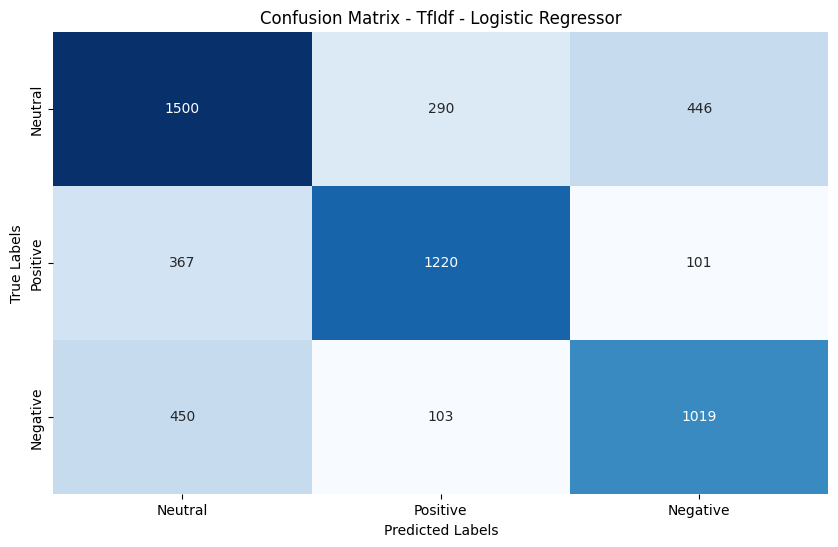

In [39]:
plt.figure(figsize=(10,6))

sns.heatmap(logistic_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - TfIdf - Logistic Regressor")
plt.show()

In [40]:
tfidf_models.append({'Model Name': 'Logistic Regression', **logistic_metrics})
scores_tfidf_models = pd.DataFrame(tfidf_models)

##### Random Forest:

In [41]:
rf_model=RandomForestClassifier()
rf_model.fit(X_resampled,y_resampled)
rf_pred=rf_model.predict(X_test)

rf_confusion=confusion_matrix(y_test, rf_pred)

rf_metrics=evaluate_metrics(rf_model, X_test, y_test)
rf_metrics

{'Accuracy': 69.72343522561863,
 'Precision': 0.696581631002887,
 'Recall': 0.6972343522561864,
 'F1-Score': 0.696100953231519,
 'MAE': 0.4495997088791849}

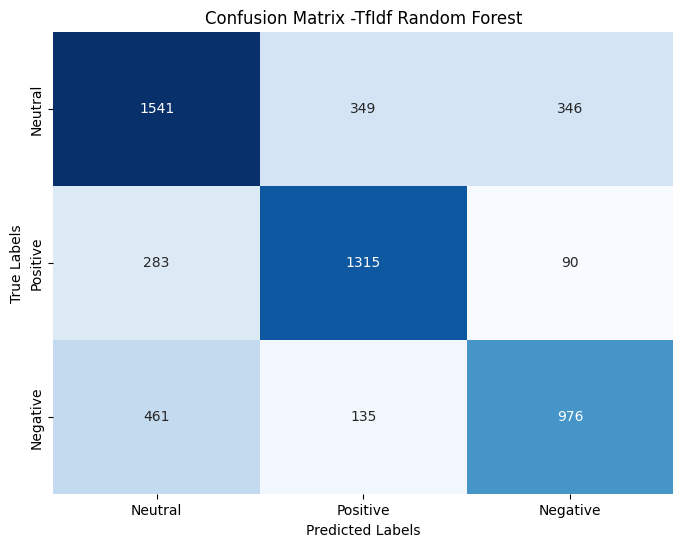

In [42]:
plt.figure(figsize=(8,6))

sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix -TfIdf Random Forest")
plt.show()

In [43]:
tfidf_models.append({'Model Name': 'Random Forest', **rf_metrics})
scores_tfidf_models = pd.DataFrame(tfidf_models)

##### Support Vector Classifier:

In [44]:
svc_model = SVC()
svc_model.fit(X_resampled,y_resampled)
svc_pred=svc_model.predict(X_test)

svc_confusion=confusion_matrix(y_test, svc_pred)

svc_metrics=evaluate_metrics(svc_model, X_test, y_test)
print(svc_metrics)

tfidf_models.append({'Model Name': 'Support Vector Classifier', **svc_metrics})
scores_tfidf_models = pd.DataFrame(tfidf_models)

{'Accuracy': 69.39592430858806, 'Precision': 0.7000963511284893, 'Recall': 0.6939592430858806, 'F1-Score': 0.6940192242917077, 'MAE': 0.46251819505094616}


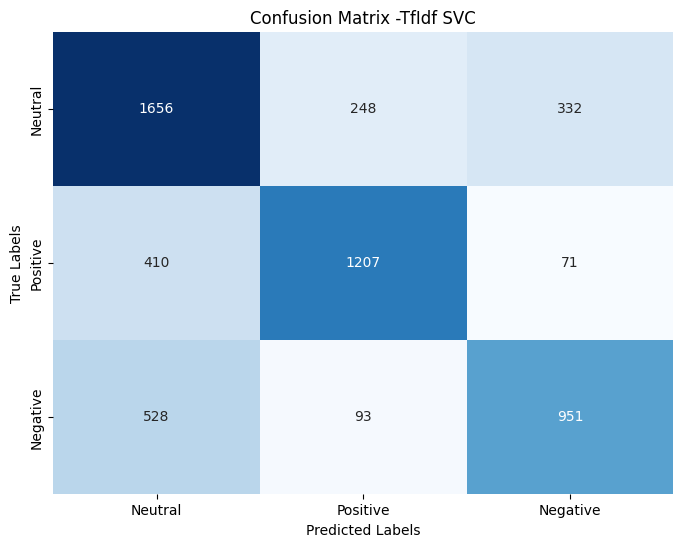

In [45]:
plt.figure(figsize=(8,6))

sns.heatmap(svc_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix -TfIdf SVC")
plt.show()

##### Gradient Boosting Classifier:

In [46]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_resampled,y_resampled)
gb_pred=gb_model.predict(X_test)

gb_metrics=evaluate_metrics(gb_model, X_test, y_test)
gb_metrics

{'Accuracy': 66.43013100436681,
 'Precision': 0.6917614420541208,
 'Recall': 0.6643013100436681,
 'F1-Score': 0.6576117529869034,
 'MAE': 0.5092794759825328}

In [47]:
tfidf_models.append({'Model Name': 'Gradient Boosting Classifier', **gb_metrics})
scores_tfidf_models = pd.DataFrame(tfidf_models)

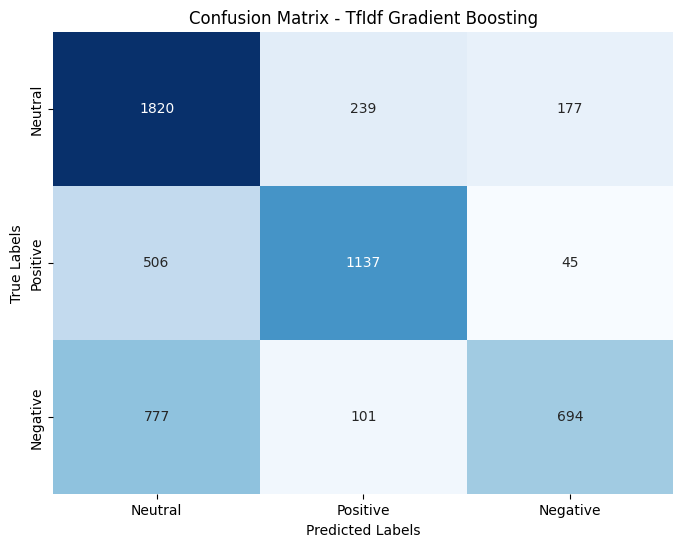

In [48]:
gb_confusion=confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(8,6))

sns.heatmap(gb_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - TfIdf Gradient Boosting")
plt.show()

##### Decision Tree:

In [49]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled,y_resampled)
dt_pred=dt_model.predict(X_test)

dt_metrics=evaluate_metrics(dt_model, X_test, y_test)
dt_metrics

{'Accuracy': 64.04657933042213,
 'Precision': 0.6406809061645264,
 'Recall': 0.6404657933042213,
 'F1-Score': 0.6391466656928583,
 'MAE': 0.5292940320232896}

In [50]:
tfidf_models.append({'Model Name': 'Decision Tree Classifier', **dt_metrics})
scores_tfidf_models = pd.DataFrame(tfidf_models)

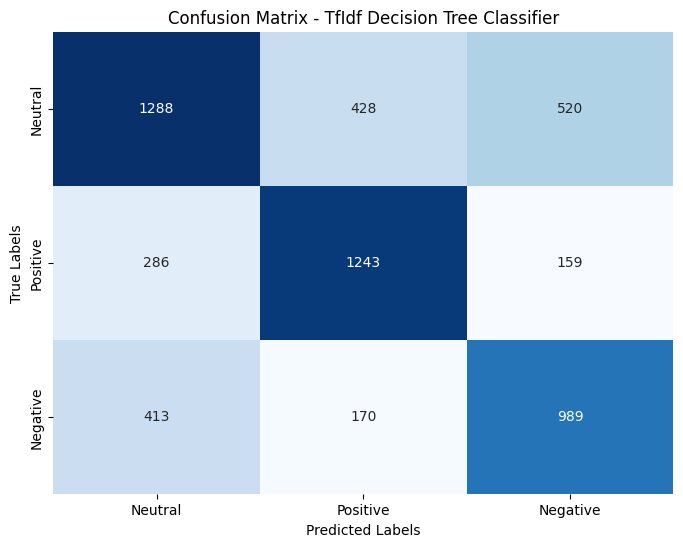

In [51]:
dt_confusion=confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8,6))

sns.heatmap(dt_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - TfIdf Decision Tree Classifier")
plt.show()

In [52]:
scores_tfidf_models

,Model Name,Accuracy,Precision,Recall,F1-Score,MAE
0,TfIdf- Naive Bayes,62.263464,0.624502,0.622635,0.616812,0.549127
1,Logistic Regression,68.031295,0.681804,0.680313,0.680855,0.482715
2,Random Forest,69.723435,0.696582,0.697234,0.696101,0.449600
3,Support Vector Classifier,69.395924,0.700096,0.693959,0.694019,0.462518
4,Gradient Boosting Classifier,66.430131,0.691761,0.664301,0.657612,0.509279
5,Decision Tree Classifier,64.046579,0.640681,0.640466,0.639147,0.529294


As we know the scores now, I will continue with **Tf-Idf Models**, lets try some hyperparameter tuning. This process involves leveraging GridSearchCV, a powerful technique, to fine-tune our models for optimal results.

In [54]:
best_models=[]

In [55]:
param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
}

nb_model= MultinomialNB()

gridsearch = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
gridsearch.fit(X_resampled, y_resampled)

best_alpha=gridsearch.best_params_['alpha']
best_score=gridsearch.best_score_

print("Best Alpha Score:", best_alpha)
print("Best Cross Validation Score:", best_score)

nb_model_best=MultinomialNB(alpha=best_alpha)
nb_model_best.fit(X_resampled, y_resampled)

nb_metrics=evaluate_metrics(nb_model_best, X_test, y_test)
print("Scores of Naive Bayes :",nb_metrics)

best_models.append({'Model Name': 'Naive Bayes', **nb_metrics})
best_models_scores=pd.DataFrame(best_models)

Best Alpha Score: 5
Best Cross Validation Score: 0.6571645358031897
Scores of Naive Bayes : {'Accuracy': 63.31877729257642, 'Precision': 0.642806260164337, 'Recall': 0.6331877729257642, 'F1-Score': 0.622873524247678, 'MAE': 0.5276564774381368}


In [56]:
logreg_best=LogisticRegression(C=2, penalty='l1', solver='liblinear')
logreg_best.fit(X_resampled, y_resampled)

logreg_test_accuracy=logreg_best.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", logreg_test_accuracy)

logreg_metrics=evaluate_metrics(logreg_best, X_test, y_test)
print("Scores: ", logreg_metrics)

best_models.append({'Model Name': 'Logistic Regression', **logreg_metrics})

Test Accuracy with Best Parameters: 0.7041484716157205
Scores:  {'Accuracy': 70.41484716157204, 'Precision': 0.7042091936498921, 'Recall': 0.7041484716157205, 'F1-Score': 0.7041135995443082, 'MAE': 0.4443231441048035}


param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

svc_model = SVC()



In [57]:
svc_best = SVC()
svc_best.fit(X_resampled, y_resampled)

svc_test_accuracy = svc_best.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", svc_test_accuracy)

svc_metrics = evaluate_metrics(svc_best, X_test, y_test)
print("Scores: ", svc_metrics)

best_models.append({'Model Name': 'Support Vector Classifier', **svc_metrics})

Test Accuracy with Best Parameters: 0.6939592430858806
Scores:  {'Accuracy': 69.39592430858806, 'Precision': 0.7000963511284893, 'Recall': 0.6939592430858806, 'F1-Score': 0.6940192242917077, 'MAE': 0.46251819505094616}


In [58]:
dt_best = DecisionTreeClassifier(max_depth=150,
                                 min_samples_split=35,
                                 min_samples_leaf=4,
                                 )
dt_best.fit(X_resampled, y_resampled)

dt_test_accuracy = dt_best.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", dt_test_accuracy)

dt_metrics = evaluate_metrics(dt_best, X_test, y_test)
print("Scores: ", dt_metrics)

best_models.append({'Model Name': 'Decision Tree', **dt_metrics})

Test Accuracy with Best Parameters: 0.6792212518195051
Scores:  {'Accuracy': 67.9221251819505, 'Precision': 0.6838538689598593, 'Recall': 0.6792212518195051, 'F1-Score': 0.6769145326054213, 'MAE': 0.47398107714701604}


param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [59]:
rf_best = RandomForestClassifier(
    n_estimators=150,
    n_jobs=130,
    max_depth=130,
    min_samples_split=35,
    min_samples_leaf=4,
)
rf_best.fit(X_resampled, y_resampled)

rf_test_accuracy=rf_best.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", rf_test_accuracy)

rf_metrics=evaluate_metrics(rf_best, X_test, y_test)
print("Scores: ", rf_metrics)

best_models.append({'Model Name': 'Random Forest', **rf_metrics})

Test Accuracy with Best Parameters: 0.6946870451237264
Scores:  {'Accuracy': 69.46870451237264, 'Precision': 0.6959178773299269, 'Recall': 0.6946870451237264, 'F1-Score': 0.6931835828321974, 'MAE': 0.4477802037845706}


param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [60]:
gb_best = GradientBoostingClassifier(n_estimators=150,
                                     learning_rate=0.01,
                                     max_depth=130,
                                     min_samples_split=25,
                                     min_samples_leaf=4)
gb_best.fit(X_resampled,y_resampled)

gb_test_accuracy = gb_best.score(X_test,y_test)
print("Test Accuracy with Best Parameters:", gb_test_accuracy)

gb_metrics = evaluate_metrics(gb_best, X_test, y_test)
print("Scores: ", gb_metrics)

best_models.append({'Model Name': 'Gradient Boosting', **gb_metrics})

Test Accuracy with Best Parameters: 0.6955967976710334
Scores:  {'Accuracy': 69.55967976710335, 'Precision': 0.6967158396767794, 'Recall': 0.6955967976710334, 'F1-Score': 0.6948255062159051, 'MAE': 0.45141921397379914}


In [62]:
scores_best_models = pd.DataFrame(best_models)
scores_best_models

,Model Name,Accuracy,Precision,Recall,F1-Score,MAE
0,Naive Bayes,63.318777,0.642806,0.633188,0.622874,0.527656
1,Logistic Regression,70.414847,0.704209,0.704148,0.704114,0.444323
2,Support Vector Classifier,69.395924,0.700096,0.693959,0.694019,0.462518
3,Decision Tree,67.922125,0.683854,0.679221,0.676915,0.473981
4,Random Forest,69.468705,0.695918,0.694687,0.693184,0.447780
5,Gradient Boosting,69.559680,0.696716,0.695597,0.694826,0.451419


The **Logistic Regression** model has emerged as the clear winner in our hyperparameter tuning process, showcasing its exceptional performance of **70.4%**. Specifically, the best-performing Logistic Regression model was configured with a regularization parameter **(C) of 2**, utilizing the **'l1' penalty** and the **'liblinear' solver.**

Given the outstanding results obtained with these specific parameters, the Logistic Regression model is a strong contender for selection as the primary model for our user interface (UI). Its accuracy, precision, and recall are all indicative of its ability to effectively comprehend the complexities of our text-based data and make accurate predictions.

However, our commitment to delivering the most robust solution prompts us to explore ensemble models further. Ensemble models, such as Random Forest, Gradient Boosting, and others, have the potential to enhance predictive power by combining the strengths of multiple models. Thus, while Logistic Regression stands as a top choice, we'll also examine the performance of ensemble models to ensure we make the most informed decision regarding our UI model selection. This rigorous evaluation process aims to guarantee that our final model not only performs exceptionally but also provides a well-rounded solution for our users.

In [63]:
#Ensembled Models:
ensembled_models=[]

In [67]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

In [68]:
adaboost_classifier=AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_resampled, y_resampled)

ab_test_accuracy=adaboost_classifier.score(X_test,y_test)
print("Test Accuracy:", ab_test_accuracy)

ab_metrics=evaluate_metrics(adaboost_classifier, X_test, y_test)
print("Scores: ", ab_metrics)

ensembled_models.append({'Model Name': 'Ada Boost', **ab_metrics})

Test Accuracy: 0.6541120815138283
Scores:  {'Accuracy': 65.41120815138282, 'Precision': 0.683379210290799, 'Recall': 0.6541120815138283, 'F1-Score': 0.6417065963947479, 'MAE': 0.5322052401746725}


In [69]:
xgb_classifier=xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_classifier.fit(X_resampled, y_resampled)

xgb_test_accuracy = accuracy_score(y_test, xgb_classifier.predict(X_test))
print("Test Accuracy with Best Parameters:", xgb_test_accuracy)

xgb_metrics=evaluate_metrics(xgb_classifier, X_test, y_test)
print("Scores: ", xgb_metrics)

ensembled_models.append({'Model Name': 'XGB Classifier', **xgb_metrics})

Test Accuracy with Best Parameters: 0.7052401746724891
Scores:  {'Accuracy': 70.52401746724891, 'Precision': 0.7061370195059938, 'Recall': 0.7052401746724891, 'F1-Score': 0.7049888160426008, 'MAE': 0.4417758369723435}


In [70]:
catboost_classifier=CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.05, verbose=100, random_seed=42)

catboost_classifier.fit(X_resampled, y_resampled)

cb_test_accuracy=catboost_classifier.score(X_test,y_test)
print("Test Accuracy with Best Parameters:", cb_test_accuracy)

cb_metrics=evaluate_metrics(catboost_classifier, X_test, y_test)
print("Scores: ", cb_metrics)

ensembled_models.append({'Model Name': 'Cat Boost', **cb_metrics})

0:	learn: 1.0899420	total: 809ms	remaining: 13m 28s
100:	learn: 0.9049496	total: 38.2s	remaining: 5m 39s
200:	learn: 0.8573347	total: 1m 16s	remaining: 5m 4s
300:	learn: 0.8229080	total: 1m 53s	remaining: 4m 23s
400:	learn: 0.7997829	total: 2m 32s	remaining: 3m 47s
500:	learn: 0.7829423	total: 3m 11s	remaining: 3m 10s
600:	learn: 0.7704626	total: 3m 52s	remaining: 2m 34s
700:	learn: 0.7601899	total: 4m 27s	remaining: 1m 54s
800:	learn: 0.7514449	total: 5m 6s	remaining: 1m 16s
900:	learn: 0.7441885	total: 5m 44s	remaining: 37.9s
999:	learn: 0.7378284	total: 6m 22s	remaining: 0us
Test Accuracy with Best Parameters: 0.6997816593886463
Scores:  {'Accuracy': 69.97816593886463, 'Precision': 0.7061793015316671, 'Recall': 0.6997816593886463, 'F1-Score': 0.6982441815598347, 'MAE': 0.4497816593886463}


In [71]:
lgb_classifier=lgb.LGBMClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.05,
    num_leaves=25,
    random_state=42
)

lgb_classifier.fit(X_resampled, y_resampled)

lgb_test_accuracy=accuracy_score(y_test, lgb_classifier.predict(X_test))
print("Test Accuracy with Best Parameters:", lgb_test_accuracy)

lgb_metrics=evaluate_metrics(lgb_classifier, X_test, y_test)
print("Scores: ", lgb_metrics)

ensembled_models.append({'Model Name': 'LGB Classifier', **lgb_metrics})

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29040
[LightGBM] [Info] Number of data points in the train set: 18627, number of used features: 941
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [72]:
scores_ensembled_models = pd.DataFrame(ensembled_models)
scores_ensembled_models

,Model Name,Accuracy,Precision,Recall,F1-Score,MAE
0,Ada Boost,65.411208,0.683379,0.654112,0.641707,0.532205
1,XGB Classifier,70.524017,0.706137,0.705240,0.704989,0.441776
2,Cat Boost,69.978166,0.706179,0.699782,0.698244,0.449782
3,LGB Classifier,69.414119,0.696129,0.694141,0.693515,0.467795


The decision to opt for Logistic Regression over XGBoost despite a slight 0.1% accuracy advantage by the latter is based on a holistic evaluation that goes beyond accuracy alone. While XGBoost showcased slightly better performance in terms of accuracy, Logistic Regression offers several practical advantages that make it the preferred choice.

Logistic Regression's foremost strength lies in its interpretability. It provides a clear understanding of how each feature influences predictions, a crucial factor when transparency and explanation are required. Furthermore, its simplicity leads to fewer hyperparameters to manage, enhancing ease of deployment and model maintenance. 

Logistic Regression is also resource-efficient, making it well-suited for scenarios with limited computational resources. Its consistency and robustness on unseen data, combined with its suitability to the specific dataset and domain characteristics, make it a well-rounded choice. Ultimately, the pragmatic benefits of Logistic Regression, including interpretability, simplicity, and resource efficiency, align with our project's objectives, leading to its selection as the preferred model for our user interface.

#### Saving our Model for further Deployment:

In [73]:
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle

def preprocess_combined(text):
    text = text.lower()  # Converting to lower case
    text = re.sub(r"http\S+", "", text)  # Excluding hyperlinks
    text = re.sub(r"www\.\S+", " ", text)  # Excluding links starting with 'www'
    text = re.sub(r"@\w+", " ", text)  # Excluding tagged data
    text = re.sub(r"[^A-Za-z\s]", " ", text)  # Excluding non-alphabetical characters except whitespace
    tokens = tokenizer.tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word not in stop_words]
    return ' '.join(tokens)  # Join tokens back into a string

with open('preprocess_combined.pkl', 'wb') as file:
    pickle.dump(preprocess_combined, file)

In [74]:
import joblib

# Save the trained Logistic Regression model to a file
model_filename = 'logistic_regression_model.pkl'
joblib.dump(logreg_best, model_filename)

['logistic_regression_model.pkl']